In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%config InlineBackend.figure_format = "retina"

In [9]:
df_rent = pd.read_json('data/train.json')

In [10]:
df = df_rent[(df_rent['price'] <= 10_000) & (df_rent['price'] > 100)].copy()

In [11]:
df["bathrooms"].value_counts()

1.0     39394
2.0      7456
1.5       643
3.0       402
0.0       304
2.5       202
4.0        54
3.5        14
5.0         1
10.0        1
4.5         1
Name: bathrooms, dtype: int64

In [12]:
df[df['bathrooms'] == 10]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
104459,10.0,2,424f8014bddc288d26da5fe81d0bea02,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7633,6849204,-73.9849,0c71a59cb70215fbf49c9dd93efaa172,[https://photos.renthop.com/2/6849204_1f92b58a...,3600,260 W 52 St.,low


In [13]:
df.loc[df['bathrooms'] == 10, 'bathrooms'] = 1

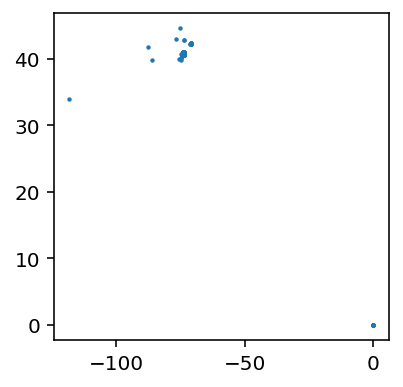

In [14]:
fig, ax = plt.subplots(figsize = (3, 3))

ax.scatter(df['longitude'], df['latitude'], s = 1.5)

plt.show()

In [15]:
df_rent[["longitude", "latitude"]].describe()

,longitude,latitude
count,49352.000000,49352.000000
mean,-73.955716,40.741545
std,1.177912,0.638535
min,-118.271000,0.000000
25%,-73.991700,40.728300
50%,-73.977900,40.751800
75%,-73.954800,40.774300
max,0.000000,44.883500


In [16]:
sum(df_rent['latitude'] == 0), sum(df_rent['longitude'] == 0), len(df_rent)

(12, 12, 49352)

In [17]:
df_rent[df_rent['latitude'] == 0]['street_address']

2028             145 28 Street
37426       Van Sicklen street
39134               219 E 28th
46941         1632 Madison Ave
49884           41-42 24th St 
63688     450 East 83rd Street
66197              247 west 87
69423              118 W 109th
70841             246 Mott St 
76934               21 W 106th
85521                338 e. 53
106350      259 Decatur Street
Name: street_address, dtype: object

Use latitude and longitude box of 40.55, -74.1 and 40.94, -73.67 on the upper right

In [22]:
df = df[(df['latitude']>40.55)&(df['latitude']<40.94) & 
  (df['longitude'] >= -74.1) & (df['longitude']<=-73.67)].copy()

In [21]:
len(df), len(df_rent)

(48415, 49352)

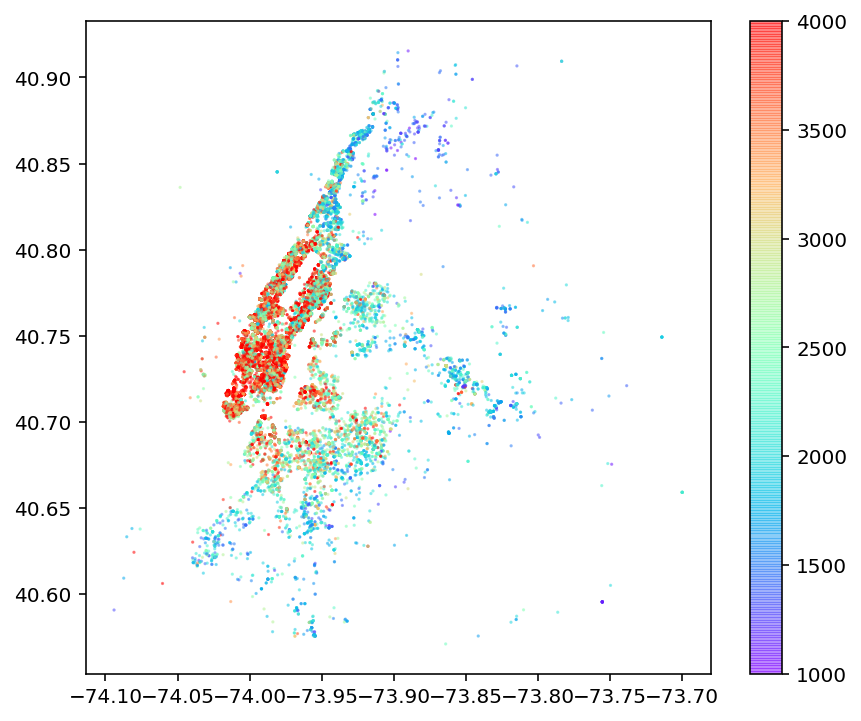

In [36]:
fig, ax = plt.subplots(figsize = (7, 6))

m = ax.scatter(df['longitude'], df['latitude'], s = 1.5, 
              alpha = 0.5, 
              cmap = "rainbow",
              c = df['price'], 
               vmax = 4000, 
               vmin = 1000, 
               marker = '.')

plt.colorbar(m)
plt.show()

## Exercise 2

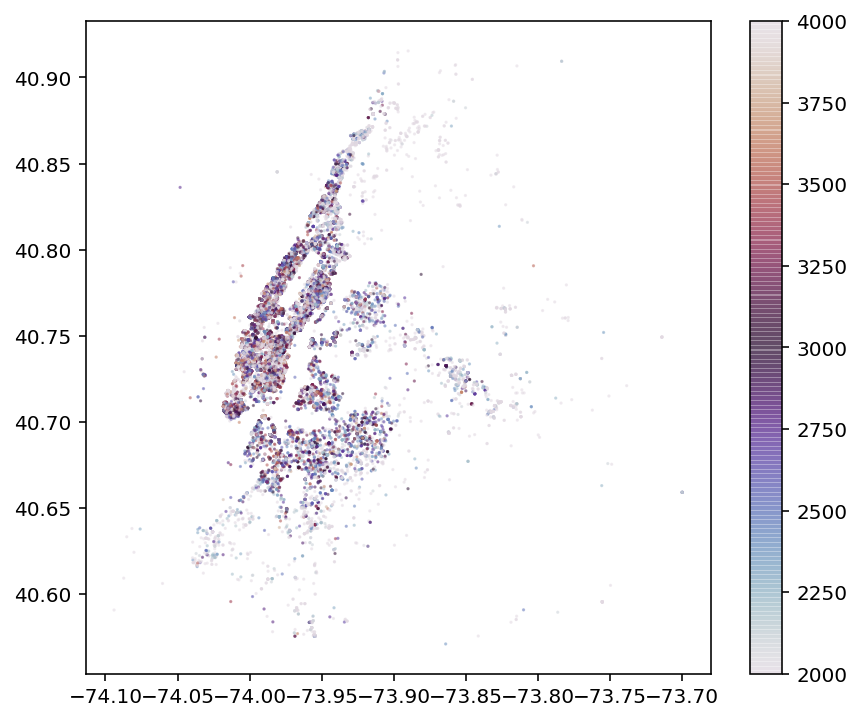

In [41]:
fig, ax = plt.subplots(figsize = (7, 6))
m = ax.scatter(df['longitude'], df['latitude'], s = 1.5, 
              alpha = 0.5, 
              cmap = "twilight",
              c = df['price'], 
               vmax = 4000, 
               vmin = 2000, 
               marker = '.')

plt.colorbar(m)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48415 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        48415 non-null  float64
 1   bedrooms         48415 non-null  int64  
 2   building_id      48415 non-null  object 
 3   created          48415 non-null  object 
 4   description      48415 non-null  object 
 5   display_address  48415 non-null  object 
 6   features         48415 non-null  object 
 7   latitude         48415 non-null  float64
 8   listing_id       48415 non-null  int64  
 9   longitude        48415 non-null  float64
 10  manager_id       48415 non-null  object 
 11  photos           48415 non-null  object 
 12  price            48415 non-null  int64  
 13  street_address   48415 non-null  object 
 14  interest_level   48415 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 5.9+ MB


In [43]:
df['created'] = pd.to_datetime(df['created'])

In [44]:
df['created'].dt.dayofweek

4         3
6         2
9         1
10        4
15        1
         ..
124000    1
124002    5
124004    1
124008    1
124009    2
Name: created, Length: 48415, dtype: int64

In [45]:
df['day'] = df['created'].dt.dayofweek

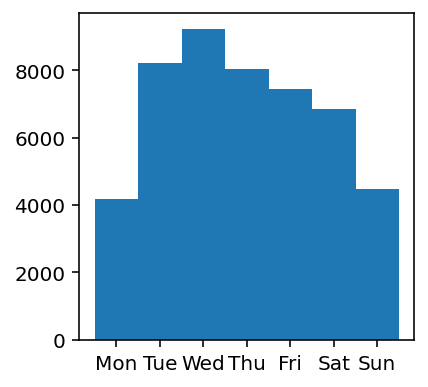

In [50]:
days = ['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun']
fig, ax = plt.subplots(figsize = (3, 3))

ax.hist(df['day'], bins = range(7 + 1), align = 'left')
ax.set_xticks(range(7))
ax.set_xticklabels(days)

plt.show()

In [53]:
daycounts = df.groupby('day').count()['price']

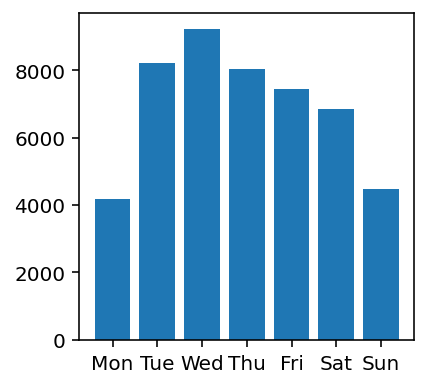

In [55]:
days = ['Mon','Tue','Wed',"Thu",'Fri','Sat','Sun']
fig, ax = plt.subplots(figsize = (3, 3))

ax.bar(range(7), daycounts)
ax.set_xticks(range(7))
ax.set_xticklabels(days)

plt.show()

use pd.cut for continuous data instead of discrete data like this for days of the week

In [58]:
df_counts = df.groupby(['day', 'interest_level']).count()['price']
df_counts

day  interest_level
0    high               337
     low               2866
     medium             969
1    high               628
     low               5642
     medium            1950
2    high               722
     low               6425
     medium            2077
3    high               636
     low               5521
     medium            1886
4    high               649
     low               4897
     medium            1905
5    high               510
     low               4844
     medium            1479
6    high               351
     low               3179
     medium             942
Name: price, dtype: int64

In [57]:
df[(df['day'] == 0) & (df['interest_level'] == 'low')].count()[0]

2866

In [62]:
low = df_counts.loc[:,'low'].values
med = df_counts.loc[:,'medium'].values
high = df_counts.loc[:,'high'].values

In [63]:
low, med, high

(array([2866, 5642, 6425, 5521, 4897, 4844, 3179]),
 array([ 969, 1950, 2077, 1886, 1905, 1479,  942]),
 array([337, 628, 722, 636, 649, 510, 351]))

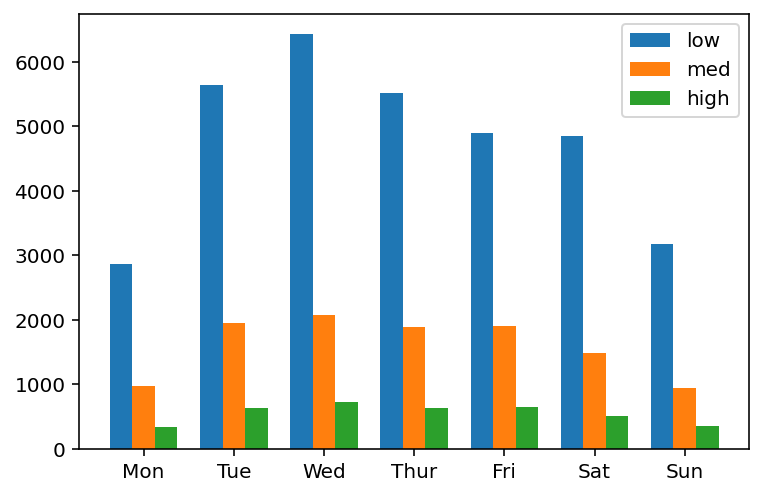

In [68]:
fig, ax = plt.subplots()

w = .25
ax.bar(np.arange(7)-w, low, width = w, label = "low")
ax.bar(np.arange(7), med, width = w, label = "med")
ax.bar(np.arange(7)+w, high, width = w, label = "high")
ax.set_xticklabels([None, "Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])

plt.legend()
plt.show()

## Exercise 3

In [153]:
df_counts.loc[:,['low', 'medium']].values

array([2866,  969, 5642, 1950, 6425, 2077, 5521, 1886, 4897, 1905, 4844,
       1479, 3179,  942])

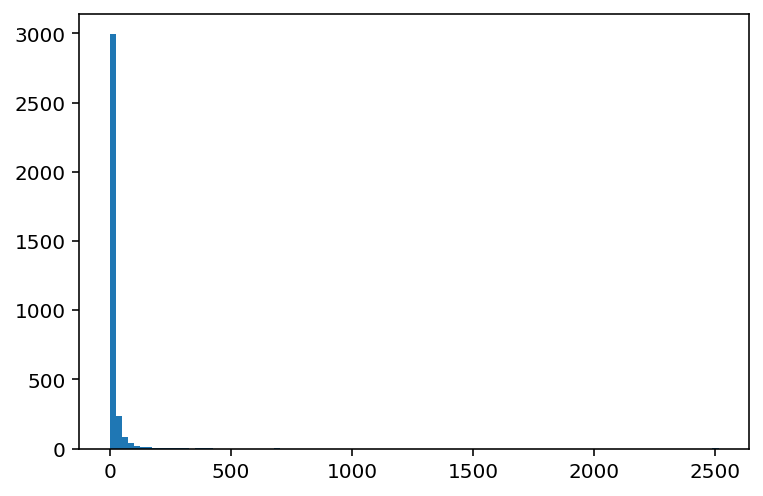

In [69]:
fig, ax = plt.subplots()


ax.hist(df.groupby('manager_id').count()['price'], bins = 100)


plt.show()

In [72]:
avg_mgr_prices = df.groupby('manager_id').mean()['price']
avg_mgr_prices

manager_id
0000abd7518b94c35a90d64b56fbf3e6     2706.416667
001ce808ce1720e24a9510e014c69707     3321.500000
003fc4e9a70053082f131b1054966aaf    10000.000000
00607a02f6efd9c6c7c588826e471ee9     2975.000000
00995ff28d79127ed2dca8320e9e7d09     2544.666667
                                        ...     
ff810b43aecfacd00f20a2912ff1e288     3400.000000
ff8f1175d95c5a866ef73399cd54a1a1     4231.428571
ffb9eceeaa4d60da7b41cc8f0954cd50     2422.500000
ffd3c60281949a5cd806030203a79558     3050.200000
ffd7307e4924587b30ec014a95db1362     3591.886957
Name: price, Length: 3415, dtype: float64

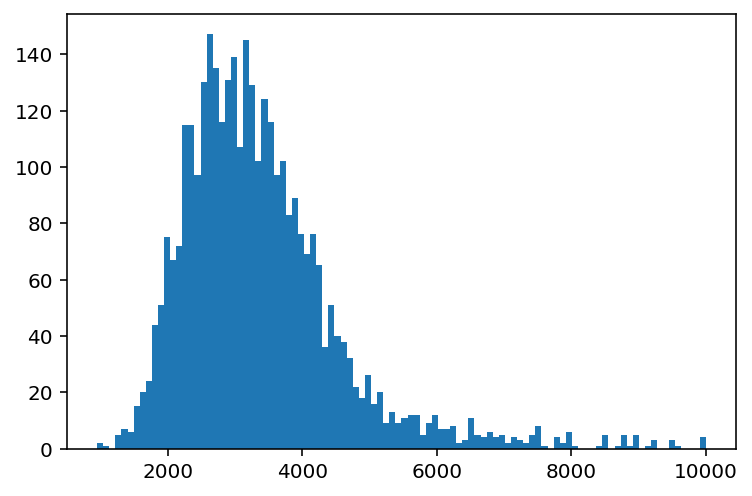

In [73]:
fig, ax = plt.subplots()


ax.hist(avg_mgr_prices, bins = 100)


plt.show()

In [81]:
df['features'] = df['features'].astype(str)

In [83]:
df['features'] = df['features'].str.lower()
df['features']

4         ['dining room', 'pre-war', 'laundry in buildin...
6         ['doorman', 'elevator', 'laundry in building',...
9         ['doorman', 'elevator', 'laundry in building',...
10                                                       []
15        ['doorman', 'elevator', 'fitness center', 'lau...
                                ...                        
124000        ['elevator', 'dishwasher', 'hardwood floors']
124002    ['common outdoor space', 'cats allowed', 'dogs...
124004    ['dining room', 'elevator', 'pre-war', 'laundr...
124008    ['pre-war', 'laundry in unit', 'dishwasher', '...
124009    ['dining room', 'elevator', 'laundry in buildi...
Name: features, Length: 48415, dtype: object

In [87]:
df['doorman'] = df['features'].str.contains('doorman')
df['laundry'] = df['features'].str.contains('laundry')
df['parking'] = df['features'].str.contains('parking')
df['hardwood'] = df['features'].str.contains('hardwood')

In [90]:
df.loc[~df['doorman'], 'price'].mean(), df.loc[df['doorman'], 'price'].mean()

(3099.5788236969524, 3936.753628179269)

In [91]:
df.groupby("doorman").mean()['price']

doorman
False    3099.578824
True     3936.753628
Name: price, dtype: float64

In [92]:
df.groupby("laundry").mean()['price']

laundry
False    3155.628269
True     3770.652492
Name: price, dtype: float64

In [93]:
df.groupby("parking").mean()['price']

parking
False    3447.547897
True     3707.196646
Name: price, dtype: float64

In [94]:
df.groupby("hardwood").mean()['price']

hardwood
False    3343.042858
True     3560.034852
Name: price, dtype: float64

In [95]:
hoods = {
    "hells" : [40.7622, -73.9924],
    "astoria" : [40.7796684, -73.9215888],
    "Evillage" : [40.723163774, -73.984829394],
    "LowerEast" : [40.715033, -73.9842724],
    "UpperEast" : [40.768163594, -73.959329496],
    "financial" : [40.703830518, -74.005666644],
}

In [96]:
np.abs(df.latitude - hoods["hells"][0]) + np.abs(df.longitude - hoods['hells'][1])

4         0.0899
6         0.0311
9         0.0346
10        0.0976
15        0.0364
           ...  
124000    0.1339
124002    0.0922
124004    0.2227
124008    0.0267
124009    0.0240
Length: 48415, dtype: float64

In [97]:
for hood, l in hoods.items(): 
    df[hood] = np.abs(df.latitude - l[0]) + np.abs(df.longitude - l[1])

In [99]:
df.T

,4,6,9,10,15,16,18,19,23,32,...,123991,123992,123995,123996,123998,124000,124002,124004,124008,124009
bathrooms,1,1,1,1.5,1,1,2,1,0,3,...,2,2,1,1,1,1,1,1,1,1
bedrooms,1,2,2,3,0,3,3,0,1,3,...,3,2,1,1,0,3,2,1,2,3
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712,cd759a988b8f23924b5a2058d5ab2b49,53a5b119ba8f7b61d4e010512e0dfc85,bfb9405149bfff42a92980b594c28234,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,0d01cabe55fa5192cdbcabd5c585c1ea,d48767c37a934daaf0bbb0e58c755d0c,d1ca33a2853e64fad6e4009d5d5d168f,5f35dc2f0191baf109221752e6ee0c48,...,9e3d6adb5653218152aa5999d8f72a4a,28d9c52abbc3f9c948ef4ac1d5276a38,0,750f265a50473ce6c515bfded25e24f5,0,92bbbf38baadfde0576fc496bd41749c,5565db9b7cba3603834c4aa6f2950960,67997a128056ee1ed7d046bbb856e3c7,3c0574a740154806c18bdf1fddd3d966,d89f514c3ed0abaae52cba7017ac0701
created,2016-06-16 05:55:27,2016-06-01 05:44:33,2016-06-14 15:19:59,2016-06-24 07:54:24,2016-06-28 03:50:23,2016-06-28 05:59:06,2016-06-08 06:21:36,2016-06-05 05:28:22,2016-06-09 04:42:03,2016-06-28 03:26:18,...,2016-04-05 02:33:43,2016-04-16 02:45:44,2016-04-11 02:23:31,2016-04-29 05:41:42,2016-04-02 01:29:32,2016-04-05 03:58:33,2016-04-02 02:25:31,2016-04-26 05:42:03,2016-04-19 02:47:33,2016-04-20 05:34:00
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Over-sized Studio w abundant closets. Availabl...,This spectacular converted 3 bed apartment all...,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,No Fee Large Renovated Sun Splashed Studio. Wa...,Extra large one bedroom apartment located in P...,Listed: 06/26/16<br /><br />Available:...,...,RARE FIND - APARTMENTS IN THIS BUILDING DON'T ...,This classic pre war building is located on a ...,"PET Friendly, ELEVATOR, LAUNDRY, OVER-SIZED, H...",Newly renovated one bedroom elevator building ...,This studio apartment is located in Hell's Kit...,There is 700 square feet of recently renovated...,"2 bedroom apartment with updated kitchen, rece...",No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,Wonderful Bright Chelsea 2 Bedroom apartment o...,***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...
display_address,145 Borinquen Place,East 44th,East 56th Street,Metropolitan Avenue,East 34th Street,East 16th Street,East 13th Street,York Avenue,E 19 Street,Hicks Street,...,E 44th St.,E 72 Street,W 11 Street,E 55th St.,West 49th Street,W 171 Street,Broadway,210 Brighton 15th St,West 21st Street,E 54th St
features,"['dining room', 'pre-war', 'laundry in buildin...","['doorman', 'elevator', 'laundry in building',...","['doorman', 'elevator', 'laundry in building',...",[],"['doorman', 'elevator', 'fitness center', 'lau...","['doorman', 'elevator', 'loft', 'dishwasher', ...","['fireplace', 'laundry in unit', 'dishwasher',...","['elevator', 'laundry in building', 'dishwashe...",['hardwood floors'],"['cats allowed', 'dogs allowed']",...,"['dining room', 'balcony', 'doorman', 'elevato...","['doorman', 'elevator', 'dishwasher', 'hardwoo...","['dishwasher', 'hardwood floors']",[],"['fireplace', 'pre-war', 'dogs allowed', 'cats...","['elevator', 'dishwasher', 'hardwood floors']","['common outdoor space', 'cats allowed', 'dogs...","['dining room', 'elevator', 'pre-war', 'laundr...","['pre-war', 'laundry in unit', 'dishwasher', '...","['dining room', 'elevator', 'laundry in buildi..."
latitude,40.7108,40.7513,40.7575,40.7145,40.7439,40.7348,40.7302,40.7769,40.7346,40.699,...,40.7516,40.7688,40.7359,40.7572,40.764,40.8433,40.8198,40.5765,40.7448,40.7594
listing_id,7170325,7092344,7158677,7211212,7225292,7226687,7126989,7114138,7131094,7224815,...,6823590,6882158,6854673,6942848,6812513,6824800,6813268,6927093,6892816,6901023
longitude,-73.9539,-73.9722,-73.9625,-73.9425,-73.9743,-73.9865,-73.9826,-73.9467,-73.9811,-73.9943,...,-73.9717,-73.9576,-74.0056,-73.9648,-73.9917,-73.9396,-73.9578,-73.9554,-74.0017,-73.9712


In [101]:
corrs = []
for hood, l in hoods.items(): 
    corr = np.corrcoef(df[hood], df['price'])
    corr = corr[0, 1]
    corrs.append(corr)
    print(f"Hood {hood} correlation with price: {corr:.3f}")
df_corr = pd.DataFrame(data = corrs, columns = ['correlation'], index = hoods.keys())

Hood hells correlation with price: -0.321
Hood astoria correlation with price: 0.054
Hood Evillage correlation with price: -0.340
Hood LowerEast correlation with price: -0.326
Hood UpperEast correlation with price: -0.136
Hood financial correlation with price: -0.300


In [103]:
df_corr.sort_values("correlation")

,correlation
Evillage,-0.340208
LowerEast,-0.326255
hells,-0.321355
financial,-0.300369
UpperEast,-0.135940
astoria,0.053675


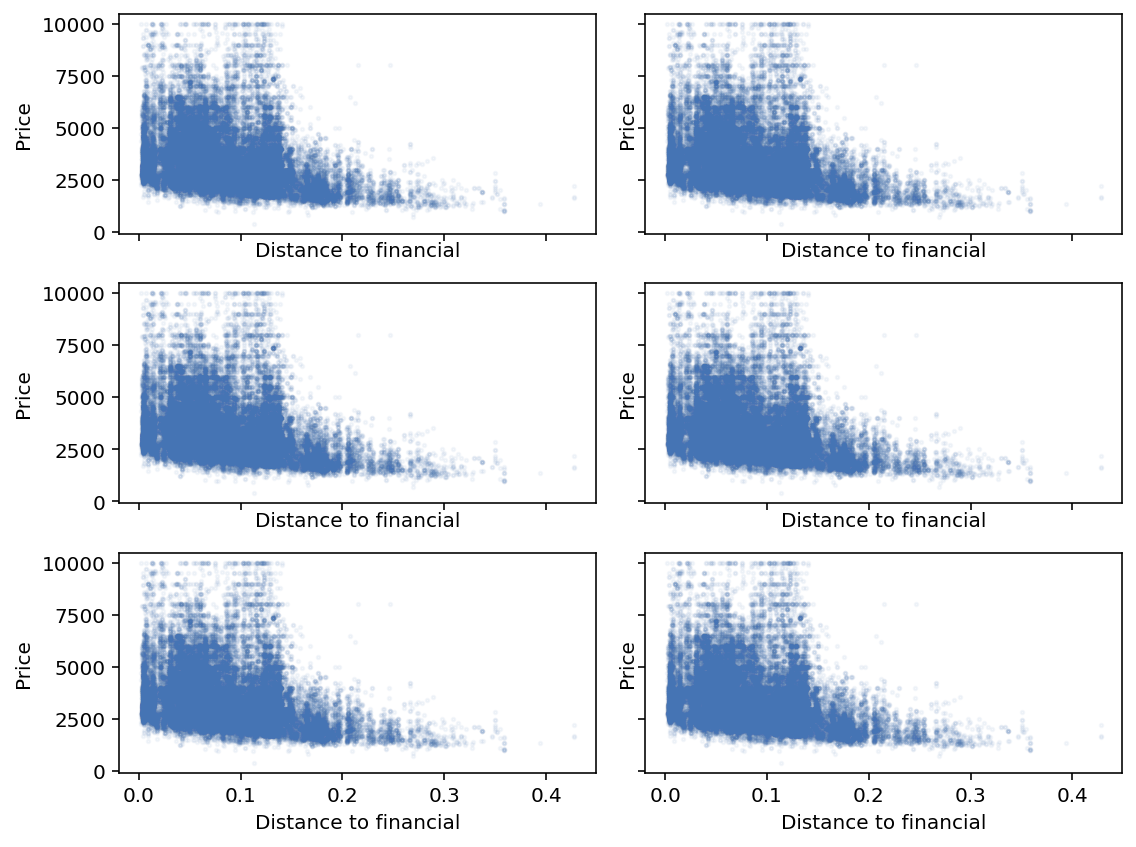

In [105]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 6), sharey=True, sharex=True)

axes = axes.flatten()
for i, hodd in enumerate(df_corr.index): 
    axes[i].scatter(df[hood], df['price'], s = 3, alpha = 0.05, c = '#4574B4')
    axes[i].set_xlabel(f"Distance to {hood}")
    axes[i].set_ylabel("Price")
    
plt.tight_layout()

plt.show()

# Bulldozer

In [107]:
df_bull = pd.read_csv('data/Train.csv', parse_dates = ['saledate'])

/Users/surengunturu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [108]:
df_bull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [109]:
df_bull = df_bull.sort_values('saledate')

In [110]:
df_bull = df_bull.set_index('SalesID')
df_bull

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
SalesID,,,,,,,,,,,,,,,,,,,,,
1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,12G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,2011-12-30,D4C,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,2011-12-30,520C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,2011-12-30,580K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df_bull.isnull().sum() / len(df_bull) * 100

SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.019882
YearMade                     0.000000
MachineHoursCurrentMeter    64.408850
UsageBand                   82.639078
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.201558
fiModelSeries               85.812901
fiModelDescriptor           82.070676
ProductSize                 52.545964
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                73.982923
Enclosure                    0.081022
Forks                       52.115425
Pad_Type                    80.271985
Ride_Control                62.952696
Stick                       80.271985
Transmission                54.320972
Turbocharged

In [113]:
df_bull.iloc[0][['Ripper', 'Backhoe_Mounting', 'Travel_Controls']]

Ripper              None or Unspecified
Backhoe_Mounting    None or Unspecified
Travel_Controls     None or Unspecified
Name: 1646770, dtype: object

In [114]:
df_bull['Tire_Size'].unique()

array([nan, '14"', 'None or Unspecified', '20.5', '23.5', '26.5', '17.5',
       '29.5', '13"', '20.5"', '23.5"', '17.5"', '15.5', '15.5"', '7.0"',
       '23.1"', '10"', '10 inch'], dtype=object)

In [115]:
df = df_bull.copy()

In [116]:
df['ProductGroup'].unique()

array(['TTT', 'BL', 'MG', 'WL', 'TEX', 'SSL'], dtype=object)

In [117]:
df['Drive_System'].unique()

array([nan, 'Two Wheel Drive', 'No', 'Four Wheel Drive',
       'All Wheel Drive'], dtype=object)

In [118]:
df['Backhoe_Mounting'].unique()

array(['None or Unspecified', nan, 'Yes'], dtype=object)

In [119]:
def df_normalize_strings(df, col):
    """standard take create one nan value (so its consistent)"""
    df[col] = df[col].str.lower()
    df[col] = df[col].fillna(np.nan) # make None -> np.nan
    df[col] = df[col].replace('none or unspecified', np.nan)
    df[col] = df[col].replace('none', np.nan)
    df[col] = df[col].replace('no', np.nan)
    df[col] = df[col].replace('#name?', np.nan)
    df[col] = df[col].replace('', np.nan)

In [120]:
df_normalize_strings(df, 'ProductGroup')
df_normalize_strings(df, 'Drive_System')
df_normalize_strings(df, 'Backhoe_Mounting')

In [121]:
df['ProductGroup'] = df['ProductGroup'].astype('category')
df['Drive_System'] = df['Drive_System'].astype('category')
df['Backhoe_Mounting'] = df['Backhoe_Mounting'].astype('category')

In [122]:
df['ProductGroup'].cat.codes

SalesID
1646770    4
1404019    0
1415646    1
1596358    5
1821514    5
          ..
6260878    4
6288376    5
6258093    0
6315563    5
6312170    2
Length: 401125, dtype: int8

In [123]:
print(df['Tire_Size'].unique())
print(df['Undercarriage_Pad_Width'].unique())

[nan '14"' 'None or Unspecified' '20.5' '23.5' '26.5' '17.5' '29.5' '13"'
 '20.5"' '23.5"' '17.5"' '15.5' '15.5"' '7.0"' '23.1"' '10"' '10 inch']
[nan 'None or Unspecified' '24 inch' '30 inch' '28 inch' '36 inch'
 '20 inch' '31 inch' '32 inch' '22 inch' '34 inch' '27 inch' '26 inch'
 '15 inch' '16 inch' '25 inch' '18 inch' '33 inch' '14 inch' '31.5 inch']


In [124]:
df_normalize_strings(df, "Tire_Size")
df['Tire_Size'].unique()

array([nan, '14"', '20.5', '23.5', '26.5', '17.5', '29.5', '13"', '20.5"',
       '23.5"', '17.5"', '15.5', '15.5"', '7.0"', '23.1"', '10"',
       '10 inch'], dtype=object)

In [125]:
df['Tire_Size'] = df['Tire_Size'].str.extract('([0-9.]*)') #regular expression

In [126]:
df['Tire_Size'].unique()

array([nan, '14', '20.5', '23.5', '26.5', '17.5', '29.5', '13', '15.5',
       '7.0', '23.1', '10'], dtype=object)

In [127]:
df['Tire_Size'] = df['Tire_Size'].astype(float)

In [128]:
df['Tire_Size'].unique()

array([ nan, 14. , 20.5, 23.5, 26.5, 17.5, 29.5, 13. , 15.5,  7. , 23.1,
       10. ])

In [129]:
def extract_sizes(df, colname):
    df[colname] = df[colname].str.extract('([0-9.]*)', expand=True)
    df[colname] = df[colname].replace('', np.nan) # empty -> NaN
    df[colname] = pd.to_numeric(df[colname]) # convert to number

In [132]:
extract_sizes(df, 'Undercarriage_Pad_Width')
print("Tire_Size", df['Tire_Size'].unique())
print("Undercarriage_Pad_Width", df['Undercarriage_Pad_Width'].unique())

Tire_Size [ nan 14.  20.5 23.5 26.5 17.5 29.5 13.  15.5  7.  23.1 10. ]
Undercarriage_Pad_Width [ nan 24.  30.  28.  36.  20.  31.  32.  22.  34.  27.  26.  15.  16.
 25.  18.  33.  14.  31.5]


In [133]:

m = df['Tire_Size'].median()  # 20.5
df['Tire_Size'] = df['Tire_Size'].fillna(m)
df['Tire_Size'].unique()

array([20.5, 14. , 23.5, 26.5, 17.5, 29.5, 13. , 15.5,  7. , 23.1, 10. ])

In [135]:
df.query("MachineHoursCurrentMeter==0")

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
SalesID,,,,,,,,,,,,,,,,,,,,,
1156368,19000,1060567,3822,121,3.0,1990,0.0,NaN,2004-01-20,950E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1160032,8500,1059951,3176,121,3.0,1986,0.0,NaN,2004-01-29,580SUPER E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158037,10500,1012999,456,121,3.0,1986,0.0,NaN,2004-01-29,PC300LC3,...,30.0,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1151730,13500,1045757,11420,121,3.0,1996,0.0,NaN,2004-02-12,TD12CXP,...,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN
1162314,28500,1062017,493,121,3.0,1992,0.0,NaN,2004-02-12,PC400LC5,...,28.0,"11' 0""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222575,48000,1061091,28920,121,3.0,2005,0.0,NaN,2011-12-22,WA250PT5L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1222646,24000,1013088,4775,121,3.0,1000,0.0,NaN,2011-12-22,670B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222672,17000,475518,3415,121,3.0,1000,0.0,NaN,2011-12-22,235C,...,36.0,"9' 6""",None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN


In [136]:
df['saleyear'] = df['saledate'].dt.year

In [137]:
df['age'] = df['saleyear'] - df['YearMade'] #common in machine learning to help with when bought
# and when made

In [138]:
sum(df['age'] == 0), len(df)

(547, 401125)

In [140]:
df.query("MachineHoursCurrentMeter==0 and age>1")

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,age
SalesID,,,,,,,,,,,,,,,,,,,,,
1156368,19000,1060567,3822,121,3.0,1990,0.0,NaN,2004-01-20,950E,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,14
1160032,8500,1059951,3176,121,3.0,1986,0.0,NaN,2004-01-29,580SUPER E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,18
1158037,10500,1012999,456,121,3.0,1986,0.0,NaN,2004-01-29,PC300LC3,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2004,18
1151730,13500,1045757,11420,121,3.0,1996,0.0,NaN,2004-02-12,TD12CXP,...,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,2004,8
1162314,28500,1062017,493,121,3.0,1992,0.0,NaN,2004-02-12,PC400LC5,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2004,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222575,48000,1061091,28920,121,3.0,2005,0.0,NaN,2011-12-22,WA250PT5L,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2011,6
1222646,24000,1013088,4775,121,3.0,1000,0.0,NaN,2011-12-22,670B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1011
1222672,17000,475518,3415,121,3.0,1000,0.0,NaN,2011-12-22,235C,...,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN,2011,1011


In [141]:
inconsistent = df.eval("MachineHoursCurrentMeter==0 and age>1")

In [142]:
df.loc[inconsistent, "MachineHoursCurrentMeter"] = np.nan

In [143]:
df.query("MachineHoursCurrentMeter==0 and age>1")

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,age
SalesID,,,,,,,,,,,,,,,,,,,,,


## Exercise 4

df[(df[colname] <= val) & (df[colname] > val)  -->  doing multiple where conditions, use paranthesis!!!

df.loc[df[colname] == val, colname] --> locate all rows with the columns equaling the value and take that column only and do something with it

m = ax.scatter(x, y, color = df['col'], vmin = val, vmax = val) --> using scatter with a bunch of different colors for each of the points based on a column, vmin and vmax are cutoffs

plt.colorbar(m) --> be able to show the colorbar with that particular coloring

pd.to_datetime(df[col]) --> convert a column to a datetime

datetimeobj.dt.dayofweek --> do a bunch of datetime operations on the datetime object

df.groupby(colnames).func() --> group by a column and perform an aggregate function

str.contains(string_val) --> see if a string contains the string value